In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from config import model_config, hp
from AE.model.autoencoder import Autoencoder
from train import train

In [2]:
model = Autoencoder(model_config)
trained_model, loss = train(model, 'data/noisy_data.pkl')

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: carlosmari (networkrl). Use `wandb login --relogin` to force relogin


 37%|███▋      | 183/500 [11:38<20:20,  3.85s/it]

In [5]:
from matplotlib.cm import get_cmap

subset = X[np.random.randint(0,X.shape[0], size = 7), :,:].to(device)

# Generate embeddings and reconstructions
embeddings_sub = model.encoder(subset)
recons = model.decoder(embeddings_sub).cpu().detach()

# Transfer to cpu and drop gradients to enable plotting
embeddings_sub = embeddings_sub.cpu().detach()
subset = subset.cpu().detach()

fig, axs = plt.subplots(1,2, figsize = (18,6))
axs = axs.flatten()


cmap = get_cmap('tab10')  # You can change 'tab10' to any other colormap

# Plot originals
for i in range(subset.shape[0]):
    axs[0].plot(subset[i].squeeze(), color=cmap(i))
axs[0].set_title("Originals")
#axs[0].set_xlim([0, 50])

# Plot reconstructions
for i in range(recons.shape[0]):
    axs[1].plot(recons[i].squeeze(), color=cmap(i))
axs[1].set_title("Reconstructions")
#axs[1].set_xlim([0, 50])

plt.tight_layout()
plt.show()

wandb.log({"plot": wandb.Image(fig)})


NameError: name 'X' is not defined

In [50]:
from sklearn.decomposition import PCA

# Compute a PCA decomposition of the dataset
embeddings = encoder(X.to(device)).cpu()
pca = PCA()
X_pca = pca.fit_transform(embeddings.detach().numpy())

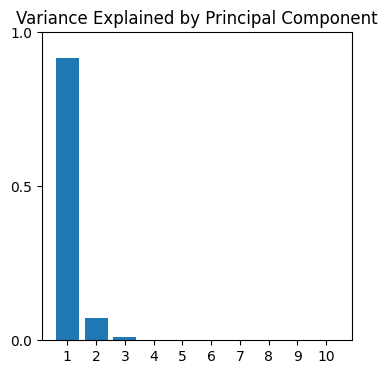

In [51]:
variances = pca.explained_variance_ratio_

# Plot formatting
plt.figure(figsize = (4,4))
plt.bar([f"{x+1}" for x in range(variances.shape[0])],height = variances)
plt.ylim(0,1.0)
plt.locator_params(axis='y', nbins=3)
plt.title("Variance Explained by Principal Component")
plt.show()

In [25]:
torch.save(model.state_dict(), './weights/fig2.pth')